In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

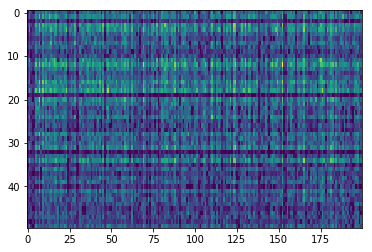

In [2]:
m, n, rank = 50, 200, 3

W_true = npr.rand(m, rank)
H_true = npr.rand(rank, n)

data = np.dot(W_true, H_true)
data += npr.randn(m, n) * .2
data = np.maximum(0, data)

mask = npr.rand(m, n) > .1

plt.imshow(data, aspect='auto', interpolation='none')

In [3]:
from lvl.factor_models import NMF
model = NMF(n_components=1)
model.fit(data)

ValueError: cannot broadcast source array for assignment

In [ ]:
W, H = model.factors
est = np.dot(W, H)
plt.imshow(est, aspect='auto', interpolation='none')

In [16]:
from tqdm import tqdm
from lvl.model_selection import cv_scores

n_ranks = 5
ranks = np.arange(1, n_ranks + 1)
n_repeats = 10

train_scores = np.ones((n_ranks, n_repeats))
test_scores = np.ones((n_ranks, n_repeats))

for i, rank in enumerate(tqdm(ranks)):
    model = NMF(n_components=rank)
    train_scores[i], test_scores[i] = cv_scores(model, data, n_repeats=n_repeats)    

100%|██████████| 5/5 [00:01<00:00,  3.49it/s]


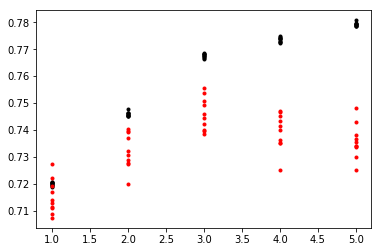

In [19]:
plt.plot(ranks, train_scores, '.k');
plt.plot(ranks, test_scores, '.r');